# Lorentz Transformation Visualization

###### Adjust the Sliders below to see how the coordinate system for something might chang as the speed of that thing increases with respect to the speed of light!

#### The value of beta represents at what fraction of the speed of light something maybe travelling at. We can think of the following plot as how the world itself changes in the perspective of an object travelling at relativistic speeds. Here, we apply the Lorentz transformation to see this special perspective of the object.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
from IPython.display import display, Image as IPImage
from PIL import Image
import os

### Lorentz Function

In [43]:
def lorentz_transform(beta):
    '''definition of gamma, relativistic by-product of travelling at extreme speeds'''
    gamma = 1 / np.sqrt(1 - beta**2) 
    return np.array([[gamma, gamma*beta], [gamma*beta, gamma]])

In [50]:
os.makedirs("LorentzImages", exist_ok=True)

### Plot Creator

In [45]:
def make_plot(beta,**kwargs):
    '''changes in the cartesian coordinate system with respect to changes in the fractions of speed 
    with respect to light.'''
    show = kwargs.get('show', None)
    saving = kwargs.get('saving', None)
    index = kwargs.get('index', None)
    
    fig, ax = plt.subplots(figsize=(6, 6));
    
    ax.set_aspect('equal')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('x')
    ax.set_ylabel('t')

    # Regular Coordinate System:
    N = 201
    t = np.linspace(-100, 100, N)
    x = np.linspace(-100, 100, N)
    T, X = np.meshgrid(t, x)

    # Light cone plot
    ax.plot(t, t, color='green', linestyle='--')
    ax.plot(t, -t, color='green', linestyle='--')
    
    ##color change to indicate different sections of the light cone
    ax.fill_between(t, t, -t, color='gray', alpha=0.7)
    ax.fill_between(t, -t, t, color='gray', alpha=0.7)


    # Applying the Lorentz transformation to the coordinate system:
    TX = np.array([T.reshape(-1), X.reshape(-1)])
    TX_transformed = lorentz_transform(beta).dot(TX)
    T_transformed = TX_transformed[0].reshape(T.shape)
    X_transformed = TX_transformed[1].reshape(X.shape)

    # Plot the original grid
    ax.plot(T, X, '-', color='lightgray')
    ax.plot(X, T, '-', color='lightgray')
    
    # Plot the invariant hyperbola
    t_fine = np.linspace(-5, 5, 100)
    xh1 = np.cosh(t_fine)
    yh1 = np.sinh(t_fine)
    xh2 = -np.cosh(t_fine)
    yh2 = np.sinh(t_fine)

    ax.plot(xh1, yh1, color='blue')
    ax.plot(xh2, yh2, color='blue')
    ax.plot(yh1, xh1, color='blue')
    ax.plot(yh2, xh2, color='blue')

    # Plot the transformed grid
    ax.plot(T_transformed, X_transformed, '-', color='black')
    ax.plot(X_transformed, T_transformed, '-', color='black')
    ax.set_title(r'$\beta$' + f' = {beta:.2f}')
    
    if saving == True:
        plt.savefig(f'LorentzImages/{index:003}',dpi=100)    
    
    if show == False:
        plt.close('all')
    
    plt.show()

### 

In [46]:
#interactable slider
interact(make_plot, beta = FloatSlider(min=0, max=0.99999, step=0.02, value=0.)); 

interactive(children=(FloatSlider(value=0.0, description='beta', max=0.99999, step=0.02), Output()), _dom_clas…

### Creating Images for the GIF

In [47]:
BetaVals = np.linspace(0,1,50)
for i in range(len(BetaVals)):
    plot = make_plot(BetaVals[i], show=False, saving=True, index=i)

C:\Users\satya\AppData\Local\Temp\ipykernel_13724\3794187081.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  gamma = 1 / np.sqrt(1 - beta**2)


### Creating the Gif

In [48]:
def create_gif(input_folder, output_file, duration=100, loop=0):
    """
    Create a GIF from a folder of images and display it in the notebook.
    
    Parameters:
        input_folder (str): Path to folder containing images
        output_file (str): Path to save the GIF (e.g., 'output.gif')
        duration (int): Duration between frames in milliseconds
        loop (int): Number of loops (0 for infinite)
    """
    # Get all image files from the folder
    images = []
    for file_name in sorted(os.listdir(input_folder)):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(input_folder, file_name)
            images.append(Image.open(file_path))
    
    # Save as GIF
    if images:
        images[0].save(
            output_file,
            save_all=True,
            append_images=images[1:],
            duration=duration,
            loop=loop
        )
        print(f"GIF created successfully at {output_file}")
        
        # Display the created GIF in the notebook
        display(IPImage(filename=output_file))
    else:
        print("No images found in the folder")

GIF created successfully at LorentzAnimation.gif


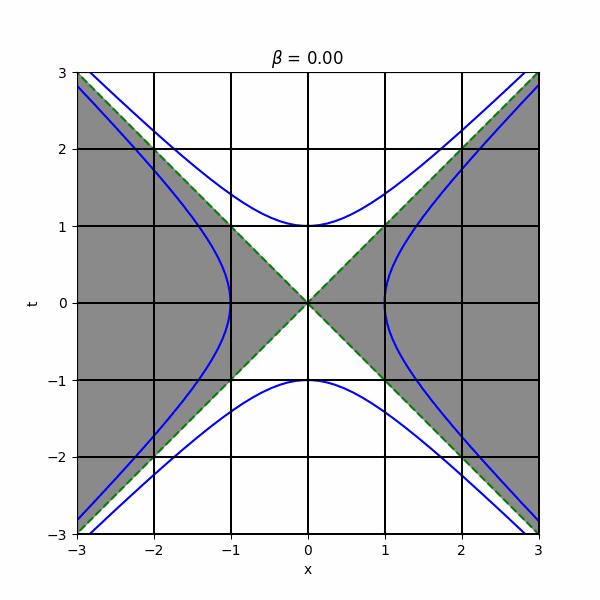

In [49]:
# Folder directory
input_folder = "LorentzImages"
output_gif = "LorentzAnimation.gif"
create_gif(input_folder, output_gif, duration=200, loop=0)